# HR ANALYTICS :Job Change of Data Scientists

In [1]:
#Importing Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load train dataset into Python Environment

In [2]:
data = pd.read_csv("aug_train.csv")

In [3]:
# Display the first few rows of the train dataset
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Display the last few rows of the train dataset
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [5]:
# checking shape of the train data
data.shape

(19158, 14)

In [6]:
# Display the columns in train data
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
# checking info for dtype and value count
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me



**from above the train dataset has 19158 row entries and 14 columns.**

In [8]:
data[['relevent_experience','experience','last_new_job']].sample(15) #sample data

,relevent_experience,experience,last_new_job
13609,No relevent experience,10,3
1461,No relevent experience,4,1
14549,Has relevent experience,6,1
11581,Has relevent experience,9,never
382,No relevent experience,5,4
5105,Has relevent experience,10,1
14167,No relevent experience,3,1
17423,Has relevent experience,1,1
1298,Has relevent experience,10,2
811,Has relevent experience,10,3


In [9]:
#checking for unique value of each columns
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [10]:
# basic descriptive statistics view for train data
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [11]:
data.describe(include="all")

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


**Performing value counts to categorical values.**

In [12]:
data["city"].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [13]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [14]:
data["major_discipline"].replace(["Business Degree", "No Major"],
                             ["Business_Degree","No_Major"],inplace=True) # replacing to valid feature names

In [15]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business_Degree      327
Arts                 253
No_Major             223
Name: major_discipline, dtype: int64

In [16]:

data["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [17]:

data["relevent_experience"].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [18]:
data["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [19]:
data["enrolled_university"].replace(["Full time course", "Part time course"],
                             ['Full_time_course','Part_time_course'],inplace=True) #replacing to valid feature names

In [20]:
data["enrolled_university"].value_counts()

no_enrollment       13817
Full_time_course     3757
Part_time_course     1198
Name: enrolled_university, dtype: int64

In [21]:
data["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [22]:
data["experience"].replace([">20","<1"],["21","0"],inplace=True) #replacing to valid feature values.

In [23]:
data["education_level"].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [24]:
data["education_level"].replace(["High School", "Primary School"],
                             ['High_School','Primary_School'],inplace=True) #replacing to valid feature names.

In [25]:
data["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [26]:
data["last_new_job"].replace([">4"],
                        ['5'],inplace=True) #replacing to a valid feature value.

In [27]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business_Degree      327
Arts                 253
No_Major             223
Name: major_discipline, dtype: int64

In [28]:

data["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [29]:
data["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [30]:
data["company_type"].replace(["Pvt Ltd","Funded Startup","Public Sector","Early Stage Startup"],
                             ["Pvt_Ltd","Funded_Startup","Public_Sector","Early_Stage_Startup"],inplace=True)
#replacing to valid feature names.

In [31]:
data["company_type"].value_counts()

Pvt_Ltd                9817
Funded_Startup         1001
Public_Sector           955
Early_Stage_Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [32]:
data["last_new_job"].value_counts()

1        8040
5        3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

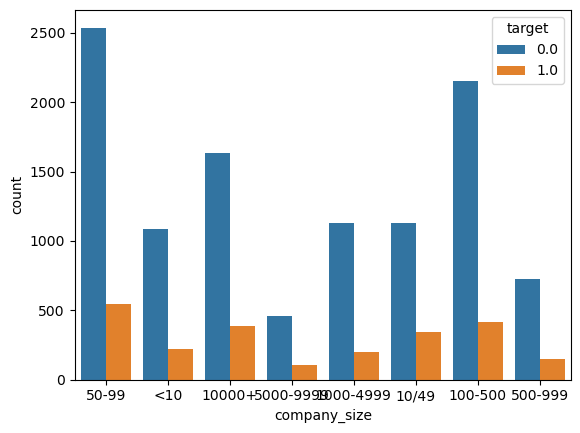

In [33]:
sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("cs_image.png")

In [34]:

#formatting company_size for better use and understanding.
data["company_size"].replace(["<10","10/49", "50-99", "100-500", "500-999", "1000-4999", "5000-9999", "10000+"],
                             ["Startup","Small","Small","Medium","Medium","Large","Large","Large"],inplace=True)


In [35]:

data["company_size"].value_counts()

Small      4554
Large      3910
Medium     3448
Startup    1308
Name: company_size, dtype: int64

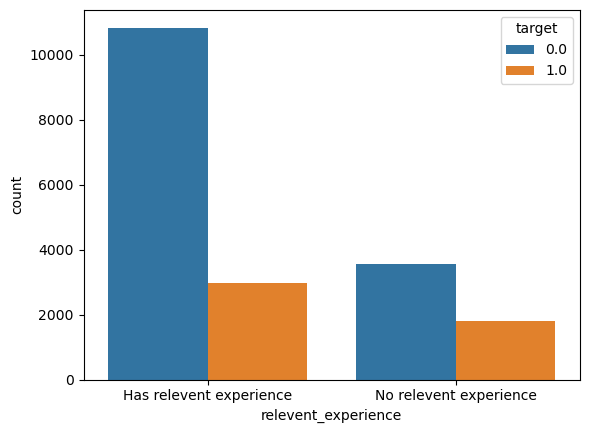

In [36]:



sns.countplot(data=data,x="relevent_experience", hue="target")
plt.savefig("re_image.png")

In [37]:
#formatting relevent_experience for better use and understanding.
data["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)


In [38]:


data["relevent_experience"].value_counts()

Yes    13792
No      5366
Name: relevent_experience, dtype: int64

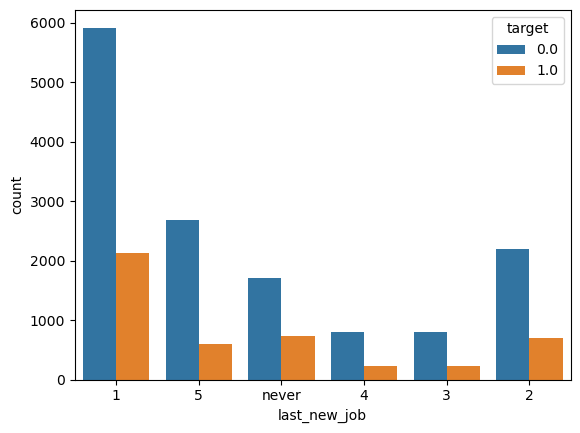

In [39]:
sns.countplot(data=data,x="last_new_job", hue="target")
plt.savefig("job_image.png")

In [40]:

#formatting last_new_job for better use and understanding.
data["last_new_job"].replace(["never"],["0"],inplace=True)

In [42]:
data["last_new_job"].value_counts()

1    8040
5    3290
2    2900
0    2452
4    1029
3    1024
Name: last_new_job, dtype: int64


# Performing Null Value Detection

In [43]:



data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


**from above some column features has null values.**

In [44]:
# target: 0 – Not looking for job change, 1 – Looking for a job change
sel_status =data["target"].value_counts()

In [45]:
#checking for unquie count of target column
sel_status

0.0    14381
1.0     4777
Name: target, dtype: int64

# UNIVARIATE ANALYSIS

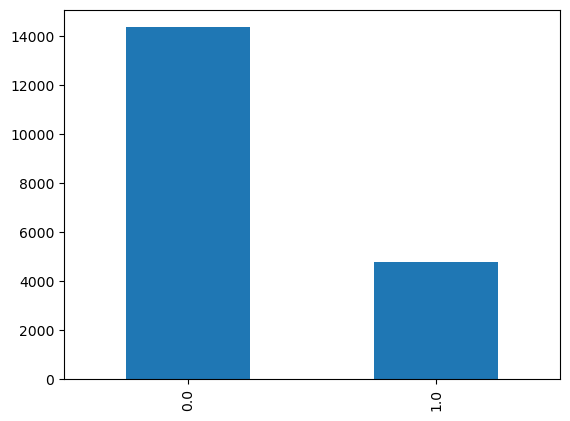

In [46]:
#Target Variable
data['target'].value_counts().plot.bar()
plt.savefig("target_image.png")


**The data is imbalanced. most of the candidates/employee wants to work with the company .**

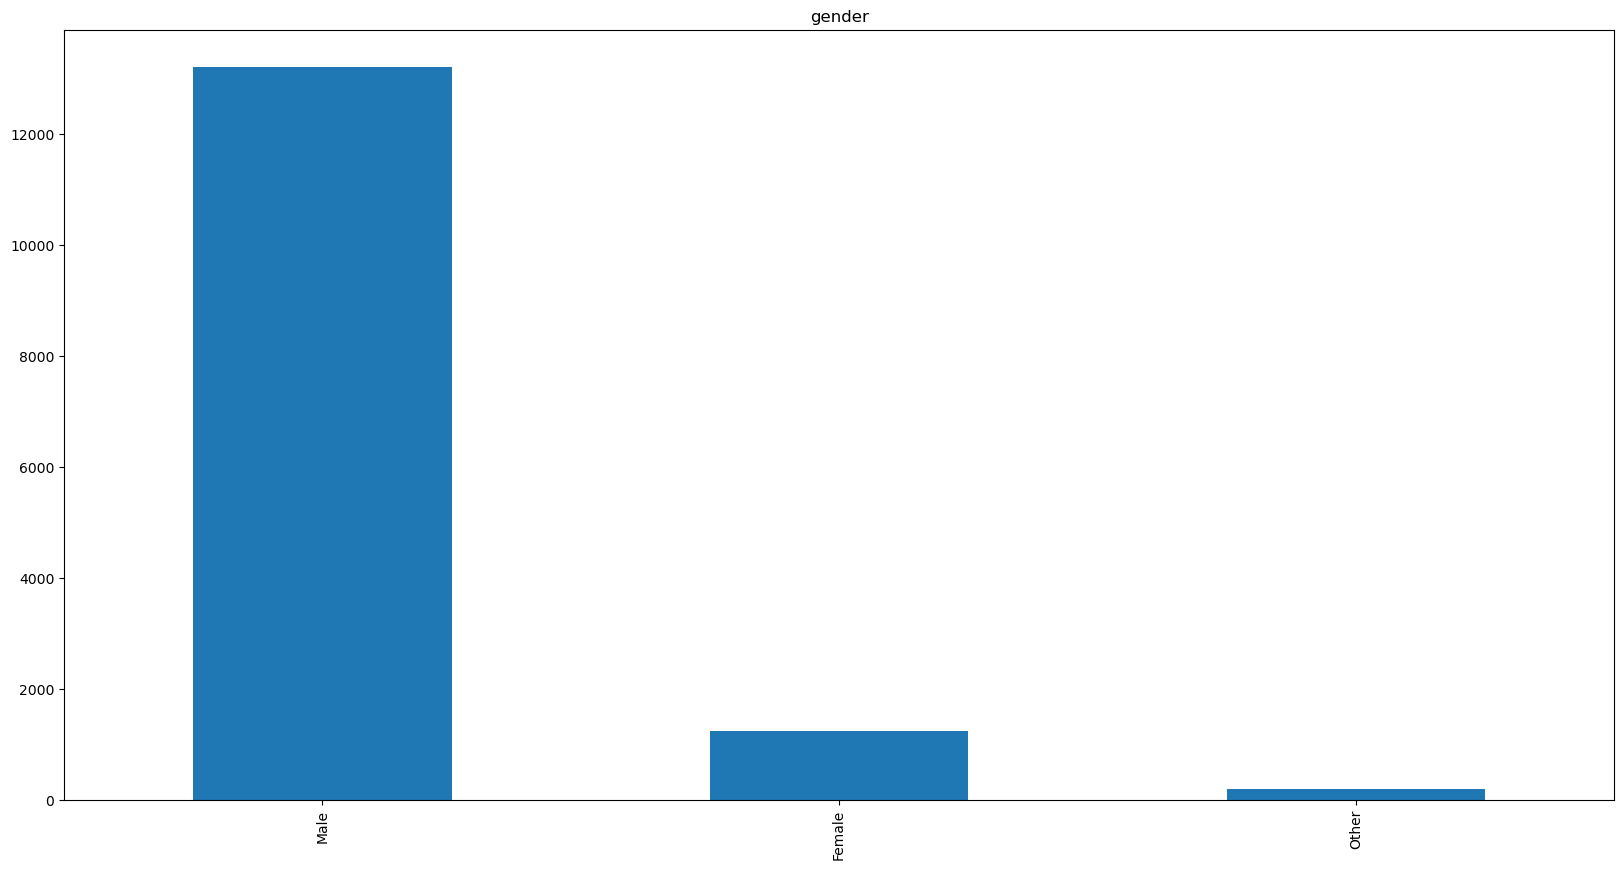

In [47]:
data["gender"].value_counts().plot.bar(figsize=(20,10), title= "gender") 
plt.savefig("gender_image.png")
plt.show()

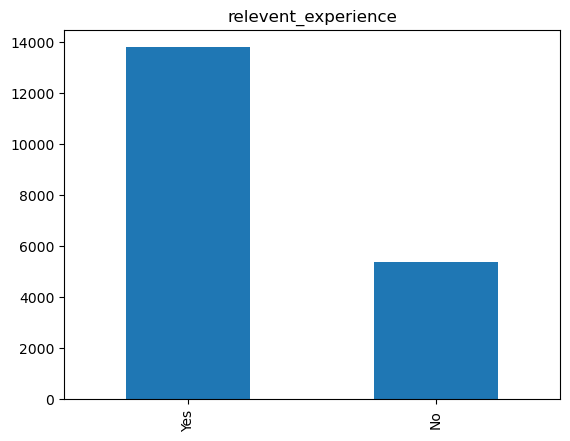

In [48]:

data['relevent_experience'].value_counts().plot.bar(title= "relevent_experience") 
plt.savefig("graph8_image.png")
plt.show()

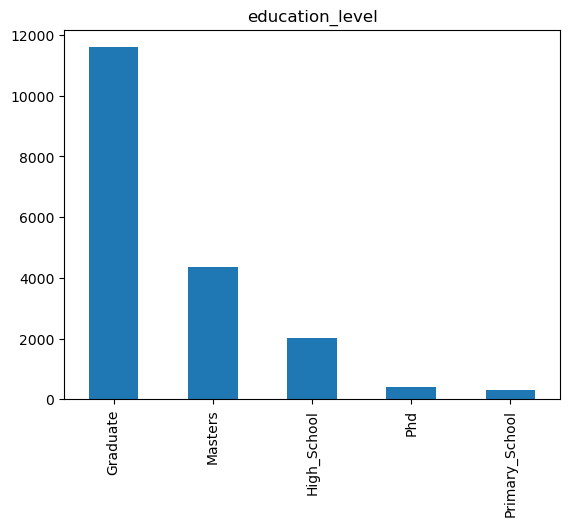

In [49]:


data["education_level"].value_counts().plot.bar(title= "education_level") 
plt.savefig("graph7_image.png")
plt.show()

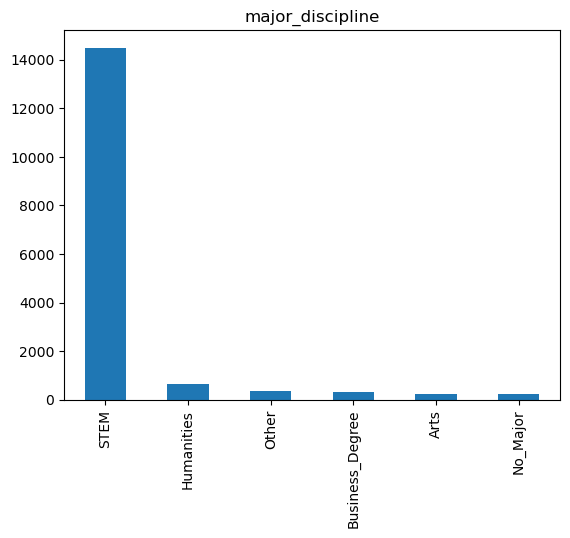

In [50]:
data["major_discipline"].value_counts().plot.bar(title="major_discipline") 
plt.savefig("graph6_image.png")
plt.show()

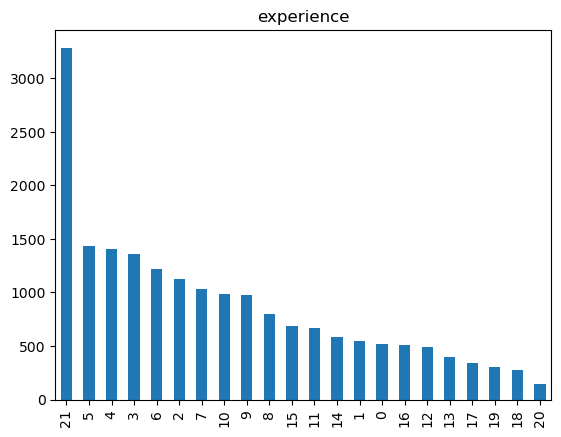

In [51]:


data["experience"].value_counts().plot.bar(title="experience") 
plt.savefig("graph5_image.png")
plt.show()

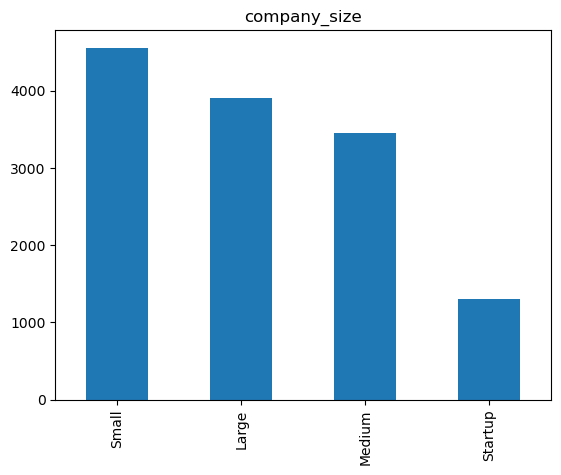

In [52]:

data["company_size"].value_counts().plot.bar(title="company_size") 
plt.savefig("graph4_image.png")
plt.show()

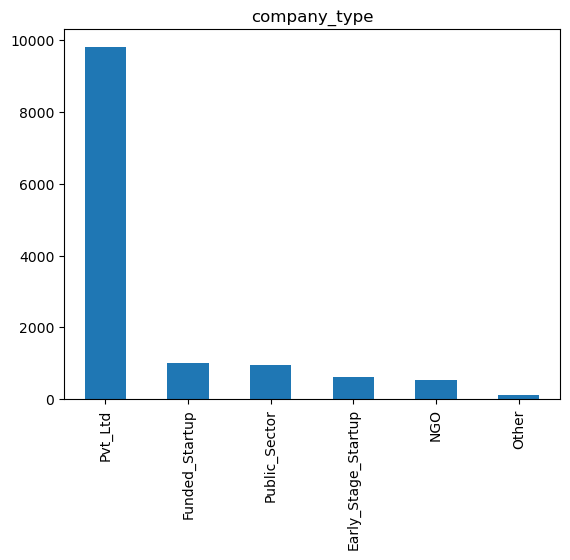

In [53]:

data["company_type"].value_counts().plot.bar(title="company_type") 
plt.savefig("graph3_image.png")
plt.show()

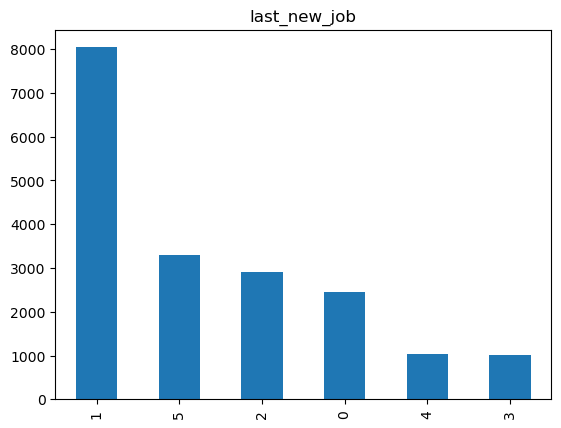

In [54]:
data["last_new_job"].value_counts().plot.bar(title="last_new_job") 
plt.savefig("graph2_image.png")
plt.show()

# BIVARIATE ANALYSIS

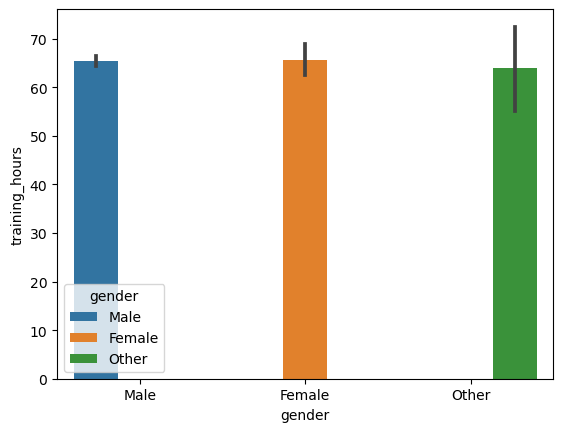

In [55]:
sns.barplot(data=data, x="gender", y="training_hours", hue="gender")
plt.savefig("graph0_image.png")
# 'hue' is used to visualize the data of different categories in one plot.

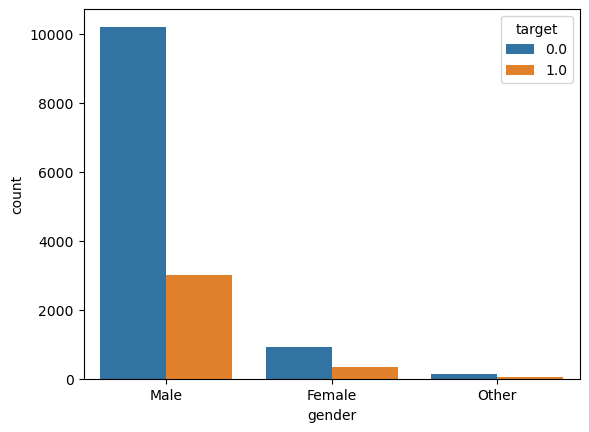

In [56]:

sns.countplot(data=data, x="gender", hue="target")
plt.savefig("gender_image1.png")

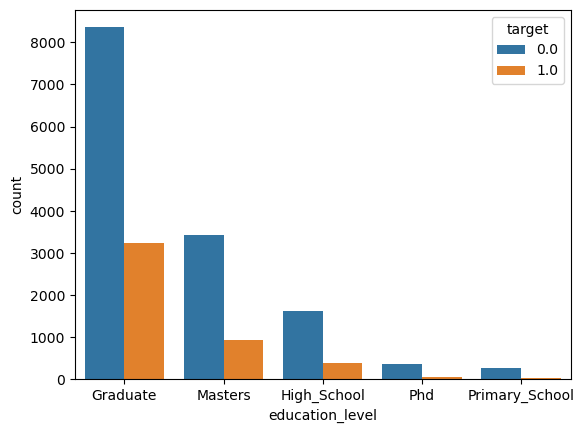

In [57]:
sns.countplot(data=data, x="education_level", hue="target")
plt.savefig("edu_image.png")

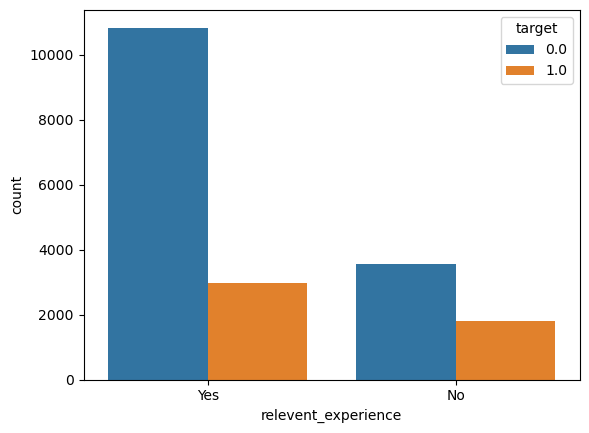

In [58]:

sns.countplot(data=data,x="relevent_experience",hue="target")
plt.savefig("rel_image.png")

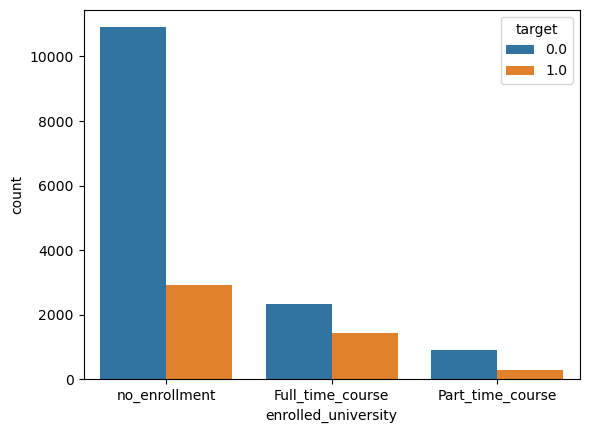

In [59]:


sns.countplot(data=data, x="enrolled_university",hue="target")
plt.savefig("uni_image.png")

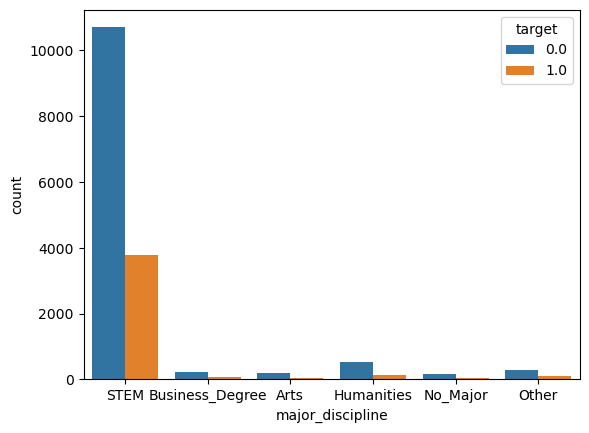

In [60]:



sns.countplot(data=data ,x="major_discipline" ,  hue="target")
plt.savefig("dis_image.png")

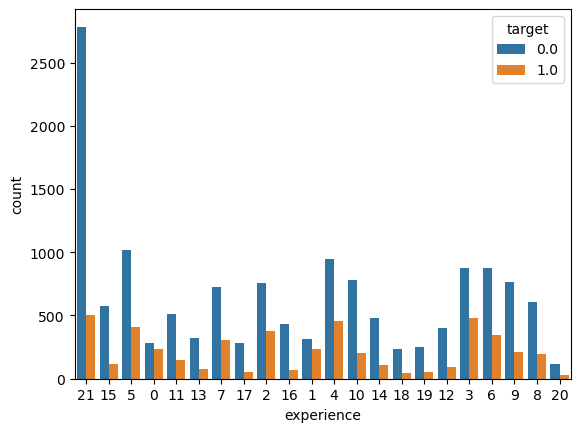

In [61]:

sns.countplot(data=data ,x="experience" ,  hue="target")
plt.savefig("exp_image.png")

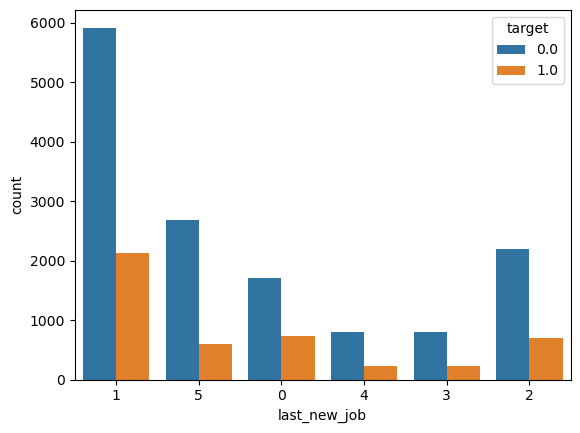

In [62]:

sns.countplot(data=data,x="last_new_job", hue="target")
plt.savefig("lastnew_image.png")

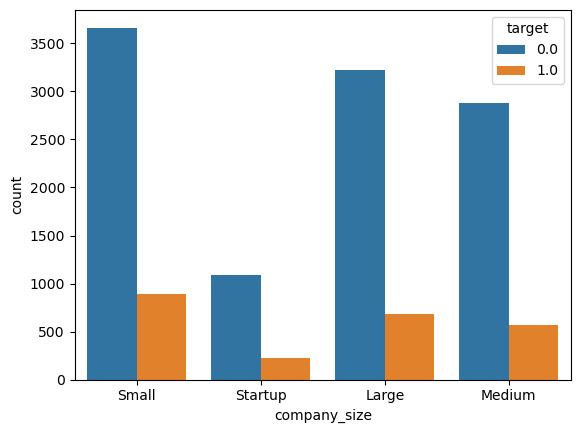

In [63]:

sns.countplot(data=data,x="company_size", hue="target")
plt.savefig("lastnew_image.png")

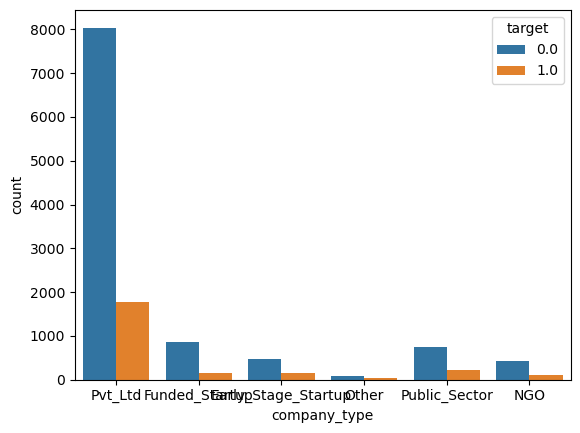

In [64]:


sns.countplot(data=data,x="company_type", hue="target")
plt.savefig("lastnew_image.png")

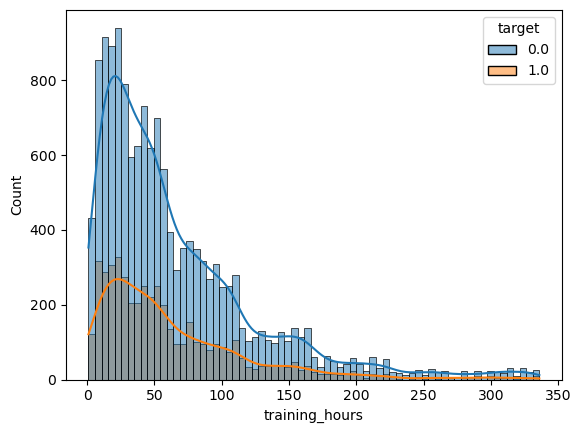

In [65]:
sns.histplot(data=data,x="training_hours", hue="target",kde=True )
plt.savefig("train_image.png")

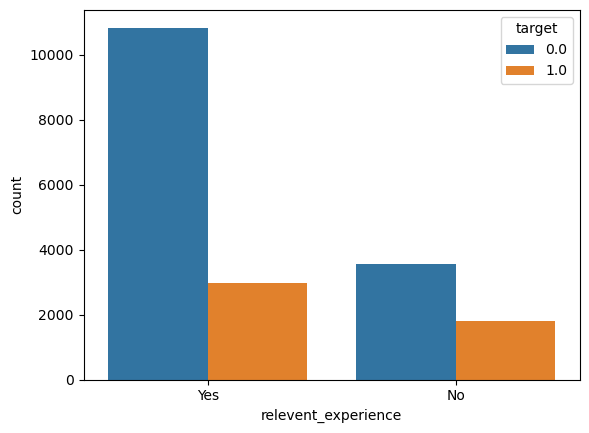

In [66]:
sns.countplot(data=data,x="relevent_experience", hue="target")
plt.savefig("rele_image.png")

**1.Data is imbalance as per target feature.**

**2.Company type, Gender, city, city development index & major discipline data is completely imbalanced & one sided hence it   will not consider this feature for training.**


C:\Users\skshe\AppData\Local\Temp\ipykernel_21216\503593762.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})


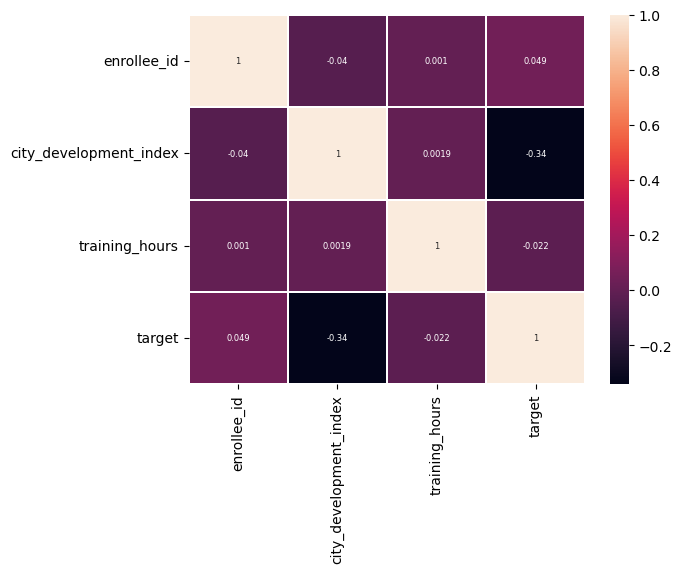

In [67]:
#heatmap of column feature

sns.heatmap(data.corr(),annot = True,linewidths=0.1,annot_kws={"fontsize":6})
plt.show()


# Filling NULL Values

In [68]:
#Filling with new unique names in certain features 
data["company_size"].fillna(value="NW",inplace=True) #not working yet
data["company_type"].fillna(value="NW",inplace=True)
data["gender"].fillna(value="DNM",inplace=True) #Didnot mention

In [69]:
#filling the null values with most frequent ones for categorical values
data["enrolled_university"].fillna(data["enrolled_university"].mode()[0],inplace=True)

In [70]:
data["education_level"].fillna(data["education_level"].mode()[0],inplace=True)

In [71]:

data["major_discipline"].fillna(data["major_discipline"].mode()[0],inplace =True)

In [72]:

data["experience"].fillna(data["experience"].mode()[0],inplace=True)

In [73]:


data["last_new_job"].fillna(data["last_new_job"].mode()[0],inplace=True)

In [74]:
data["last_new_job"] = data["last_new_job"].astype(int)

In [75]:
data["experience"] = data["experience"].astype(int)

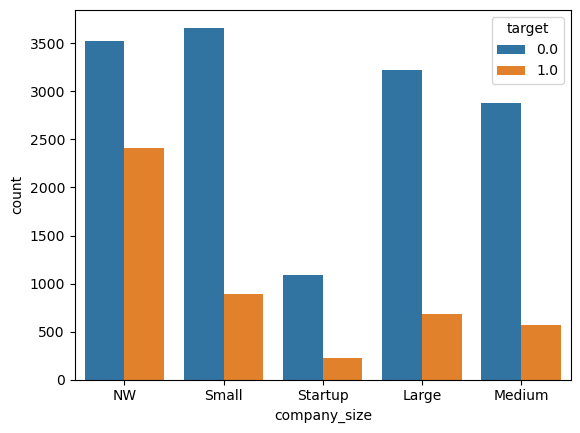

In [76]:



sns.countplot(data=data,x="company_size", hue="target") # plot after filling null values
plt.savefig("compsize_image.png")

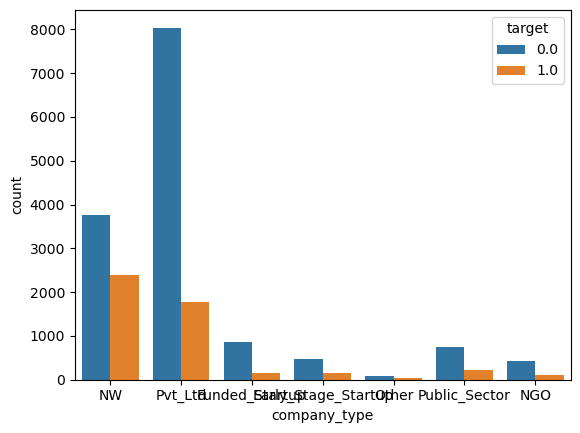

In [77]:

sns.countplot(data=data,x="company_type", hue="target")
plt.savefig("comptype_image.png")

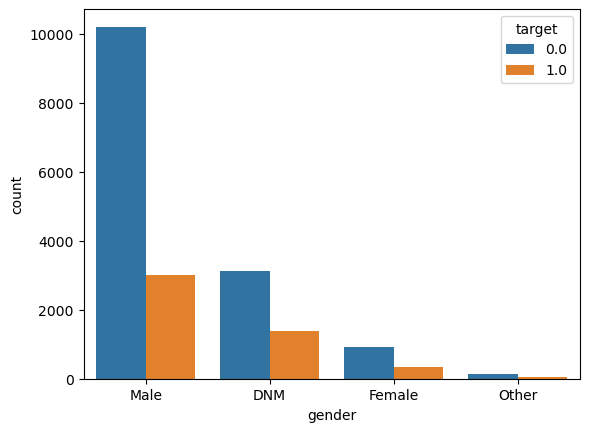

In [78]:






sns.countplot(data=data,x="gender", hue="target")
plt.savefig("gendertype_image.png") #DNM - DidNotMention

In [79]:

data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

**from above null values are filled using appropriate methods**

In [80]:

data["gender"].value_counts()

Male      13221
DNM        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [81]:
#outlier detection

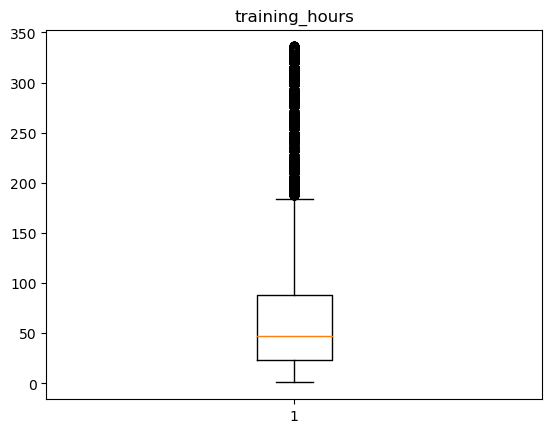

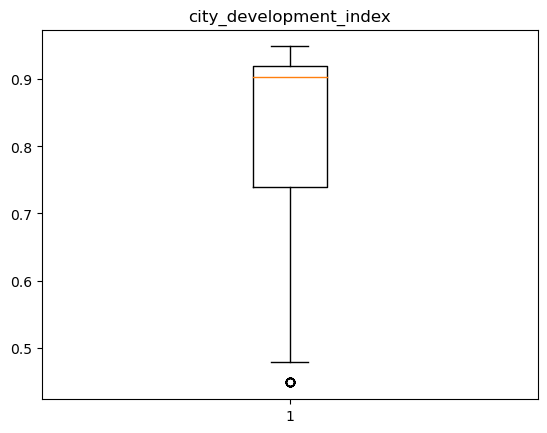

In [82]:



num_col = ["training_hours","city_development_index"]
for i in num_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

**from above the feature training hours and city development index has outliers, but removing such data can effect reliability and accuracy of data.**

# Encoding of data

In [83]:

train=data.drop(['enrollee_id',"city"],axis=1) # dropping enrollee id and city
train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,NW,NW,1,36,1.0
1,0.776,Male,No,no_enrollment,Graduate,STEM,15,Small,Pvt_Ltd,5,47,0.0
2,0.624,DNM,No,Full_time_course,Graduate,STEM,5,NW,NW,0,83,0.0
3,0.789,DNM,No,no_enrollment,Graduate,Business_Degree,0,NW,Pvt_Ltd,0,52,1.0
4,0.767,Male,Yes,no_enrollment,Masters,STEM,21,Small,Funded_Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No,no_enrollment,Graduate,Humanities,14,NW,NW,1,42,1.0
19154,0.920,Male,Yes,no_enrollment,Graduate,STEM,14,NW,NW,4,52,1.0
19155,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,Small,Pvt_Ltd,4,44,0.0
19156,0.802,Male,Yes,no_enrollment,High_School,STEM,0,Medium,Pvt_Ltd,2,97,0.0


In [84]:

from sklearn.preprocessing import LabelEncoder  

In [85]:
# using label encoding for certain categorical values

le= LabelEncoder()

In [86]:
train["relevent_experience"].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
train["relevent_experience"] = le.fit_transform(train["relevent_experience"]) #label encoding

In [88]:
train["relevent_experience"].unique()

array([1, 0])

In [89]:
train["relevent_experience"].unique()

array([1, 0])

In [90]:



train["education_level"] = le.fit_transform(train["education_level"])

In [91]:
train["education_level"].unique()

array([0, 2, 1, 3, 4])

In [92]:

train["experience"] = le.fit_transform(train["experience"])

In [93]:

train["experience"].unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20], dtype=int64)

In [94]:

train["company_size"] = le.fit_transform(train["company_size"])


In [95]:
train["company_size"].unique()

array([2, 3, 4, 0, 1])

In [96]:

train["last_new_job"] = le.fit_transform(train["last_new_job"])

In [97]:
train["gender"] = le.fit_transform(train["gender"])

In [98]:
train["gender"].unique()

array([2, 0, 1, 3])

In [99]:
train = pd.get_dummies(train)
train                  #one-hot encoding

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,enrolled_university_Full_time_course,...,major_discipline_No_Major,major_discipline_Other,major_discipline_STEM,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd
0,0.920,2,1,0,21,2,1,36,1.0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.776,2,0,0,15,3,5,47,0.0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,0,0,0,5,2,0,83,0.0,1,...,0,0,1,0,0,0,1,0,0,0
3,0.789,0,0,0,0,2,0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.767,2,1,2,21,3,4,8,0.0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,2,0,0,14,2,1,42,1.0,0,...,0,0,0,0,0,0,1,0,0,0
19154,0.920,2,1,0,14,2,4,52,1.0,0,...,0,0,1,0,0,0,1,0,0,0
19155,0.920,2,1,0,21,3,4,44,0.0,0,...,0,0,1,0,0,0,0,0,0,1
19156,0.802,2,1,1,0,1,2,97,0.0,0,...,0,0,1,0,0,0,0,0,0,1


In [100]:
train.shape

(19158, 25)

In [101]:
train.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'education_level', 'experience', 'company_size', 'last_new_job',
       'training_hours', 'target', 'enrolled_university_Full_time_course',
       'enrolled_university_Part_time_course',
       'enrolled_university_no_enrollment', 'major_discipline_Arts',
       'major_discipline_Business_Degree', 'major_discipline_Humanities',
       'major_discipline_No_Major', 'major_discipline_Other',
       'major_discipline_STEM', 'company_type_Early_Stage_Startup',
       'company_type_Funded_Startup', 'company_type_NGO', 'company_type_NW',
       'company_type_Other', 'company_type_Public_Sector',
       'company_type_Pvt_Ltd'],
      dtype='object')

<Axes: >

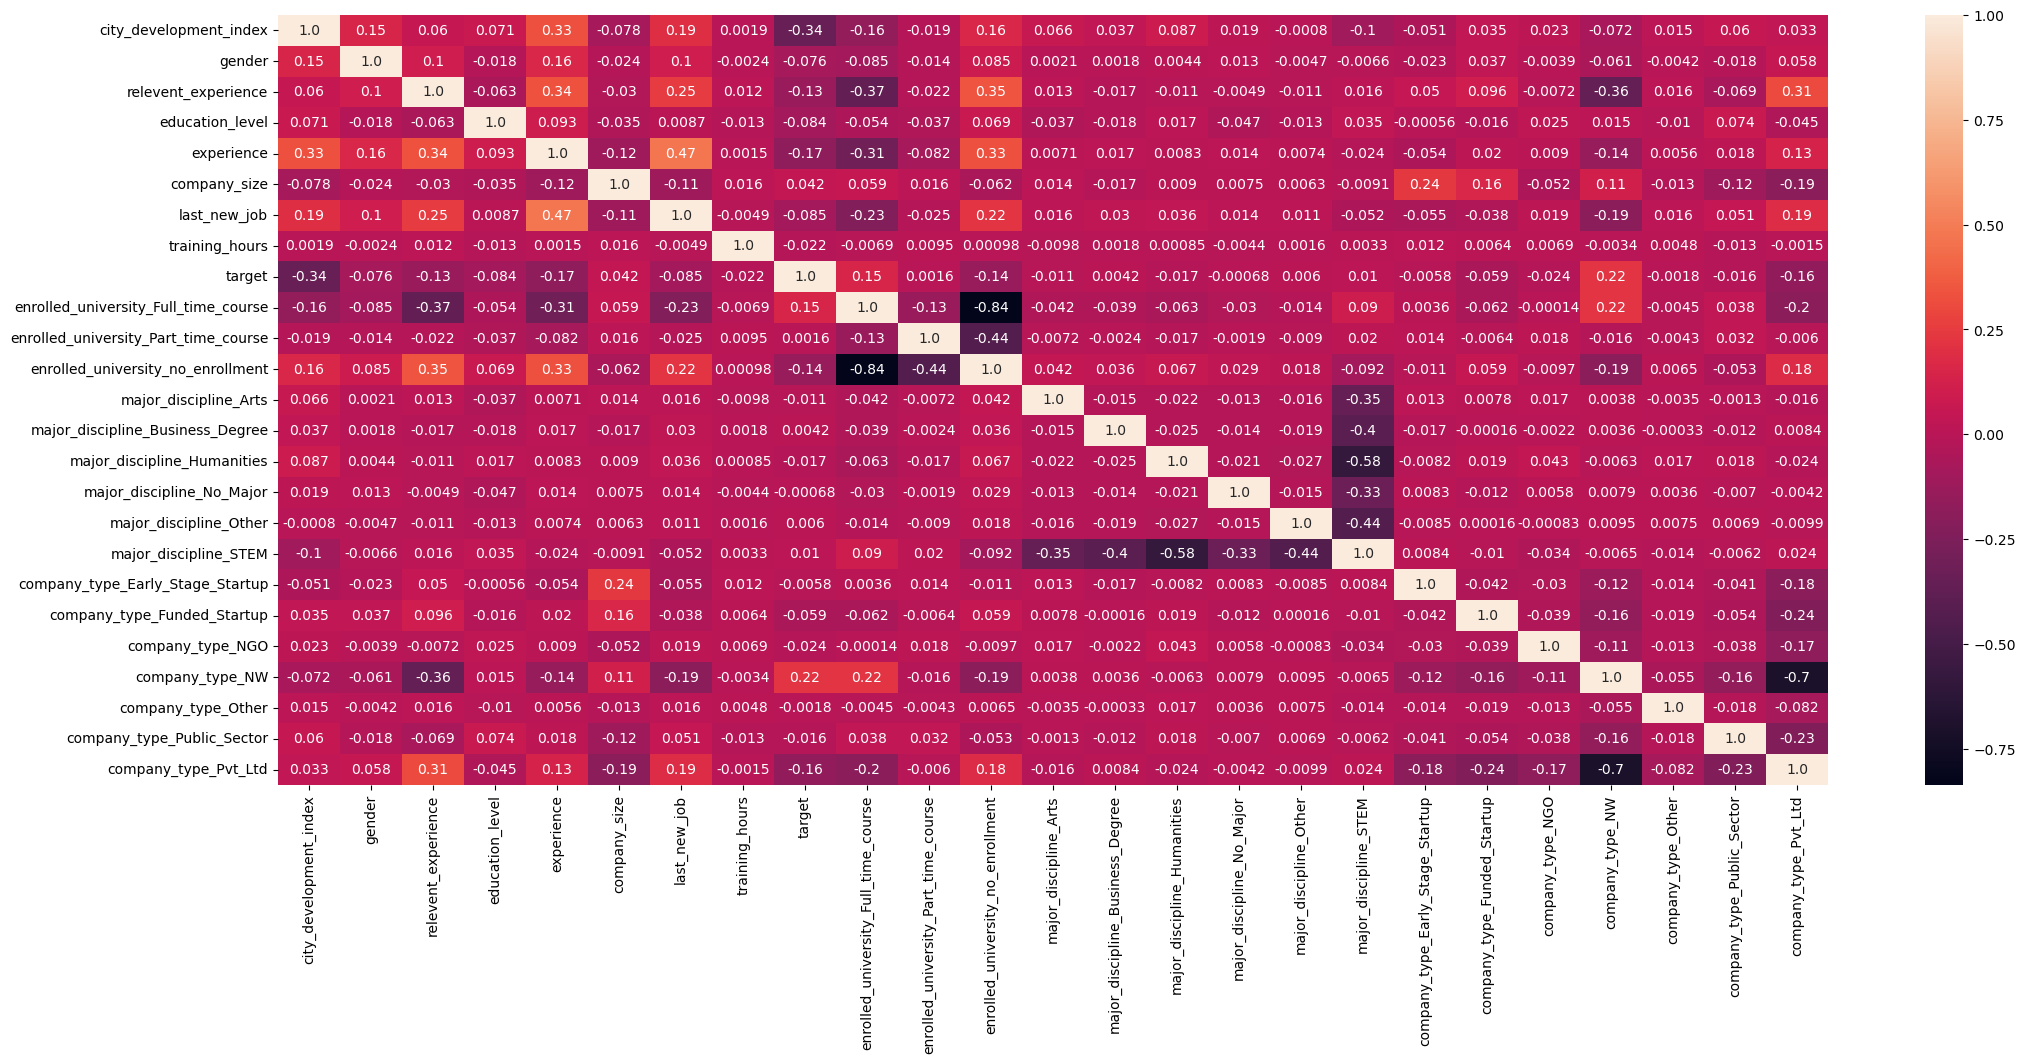

In [102]:
# Correlation matrix among features
corr = train.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

In [103]:
#Performing sampling in target inorder to reduce false negative values in classification modelling

In [104]:
X = train.drop("target",axis=1)
Y = pd.DataFrame(train["target"])  
Y

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


In [105]:

from imblearn.over_sampling import SMOTE

In [106]:


smote = SMOTE()
X,Y = smote.fit_resample(X,Y)

1.0    14381
0.0    14381
Name: target, dtype: int64


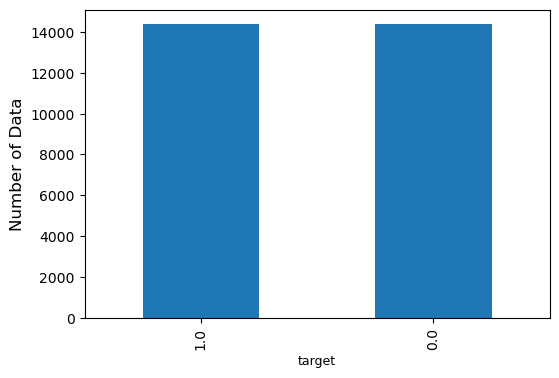

In [107]:
t = Y['target'].value_counts()  
plt.figure(figsize=(6,4))
#sns.barplot(t.values,alpha=0.8)
t.plot.bar()
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t)
plt.show()


In [108]:
Y

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
28757,1.0
28758,1.0
28759,1.0
28760,1.0


In [109]:

t

1.0    14381
0.0    14381
Name: target, dtype: int64

In [110]:
X.tail()


,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,enrolled_university_Full_time_course,enrolled_university_Part_time_course,...,major_discipline_No_Major,major_discipline_Other,major_discipline_STEM,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd
28757,0.719302,2,0,0,5,2,0,17,1,0,...,0,0,1,0,0,0,1,0,0,0
28758,0.656076,2,1,0,7,2,1,18,0,0,...,0,0,1,0,0,0,0,0,0,0
28759,0.920000,1,1,0,7,0,1,40,0,0,...,0,0,0,0,0,0,0,0,0,1
28760,0.643792,2,0,0,3,2,0,18,1,0,...,0,0,1,0,0,0,0,0,0,0
28761,0.920000,1,0,2,21,2,0,78,0,0,...,0,0,1,0,0,0,0,0,0,0


In [111]:
#perform scaling
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler_x = MinMaxScaler()
X_scale= scaler_x.fit_transform(X)

In [113]:
X_scale

array([[0.94211577, 0.66666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65469062, 0.66666667, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.35129741, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94211577, 0.33333333, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.3908026 , 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94211577, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [114]:
Y= np.squeeze(Y) #numpy.squeeze() will just trim any redundant dimensions (i.e. which are of size 1). 
#So, if your numpy array's shape is (100, 1), this will result in an array of shape (100,), 
#whereas the result for a numpy array of shape (100, 2) will not change, as none of the dimensions have size 1

In [115]:

#performing train test split
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y, test_size = 0.2, random_state=42)

In [117]:

x_test_copy = x_test.copy()

In [118]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100,solver='liblinear', penalty='l2', max_iter=5000)

In [119]:
model = lr.fit(x_train,y_train)

In [120]:
y_predictions = model.predict(x_test)

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [122]:
confusion_matrix(y_test,y_predictions)

array([[2425,  452],
       [ 728, 2148]], dtype=int64)

In [123]:
y_predictions

array([0., 0., 0., ..., 1., 1., 0.])

In [124]:
print("accuracy =",accuracy_score(y_test,y_predictions))

accuracy = 0.7948896228054928


In [125]:
print("precision =",precision_score(y_test,y_predictions))

precision = 0.8261538461538461


In [126]:
print("recall =",recall_score(y_test,y_predictions))

recall = 0.7468706536856745


In [127]:
print("f1_score =",f1_score(y_test,y_predictions))

f1_score = 0.7845142439737034


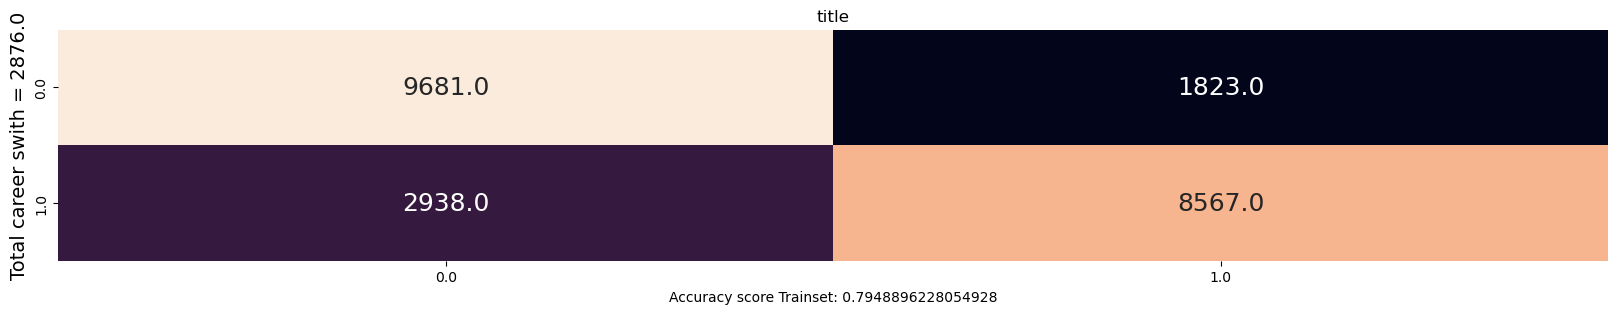

In [128]:
train_matrix = pd.crosstab(y_train, model.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
g1.set_title("title")
g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(x_test), y_test)))
plt.show() 







# DECISION TREE CLASSIFIER

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dt_cls = DecisionTreeClassifier()

In [131]:
model_dt = dt_cls.fit(x_train,y_train)

In [132]:
y_pred_dt = model.predict(x_test)

In [133]:
confusion_matrix(y_test,y_pred_dt)

array([[2425,  452],
       [ 728, 2148]], dtype=int64)

In [134]:
accuracy_score(y_test,y_pred_dt)

0.7948896228054928

In [135]:
print("precision =",precision_score(y_test,y_pred_dt))

precision = 0.8261538461538461


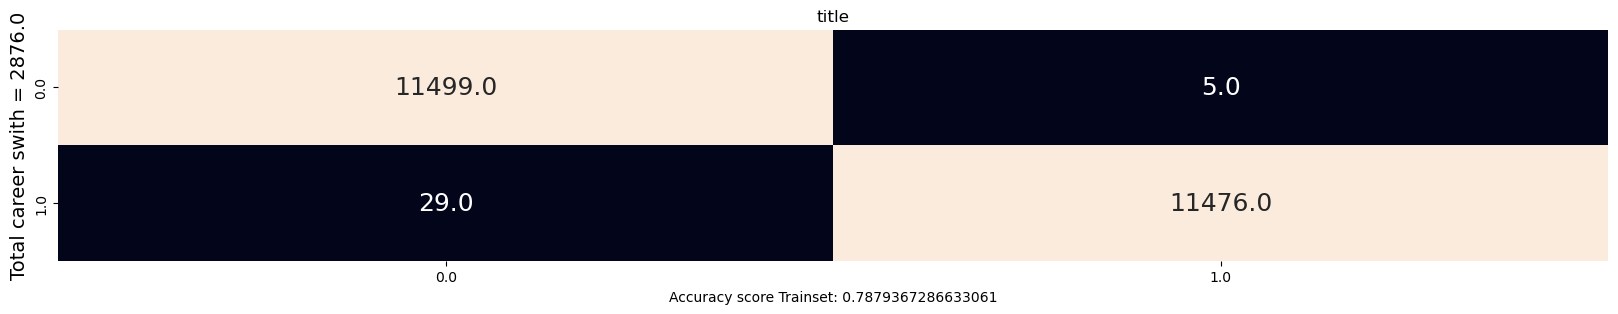

In [136]:
train_matrix = pd.crosstab(y_train, model_dt.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
g1.set_title("title")
g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model_dt.predict(x_test), y_test)))
plt.show() 


# KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
metric_k =[]

In [139]:
neighbors = np.arange(3,11)

In [140]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_s = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_s)
    metric_k.append(acc)

In [141]:
metric_k

[0.8041022075438902,
 0.8067095428472102,
 0.8126195028680688,
 0.8112289240396315,
 0.8188771075960368,
 0.8112289240396315,
 0.8124456805145142,
 0.8127933252216235]


# Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rf_cls =RandomForestClassifier()

In [144]:

model_rf = rf_cls.fit(x_train,y_train)

In [145]:
y_pred_rf = model_rf.predict(x_test)

In [146]:
confusion_matrix(y_test,y_pred_rf)

array([[2410,  467],
       [ 465, 2411]], dtype=int64)

In [147]:
accuracy_score(y_test,y_pred_rf)

0.8379975664870503

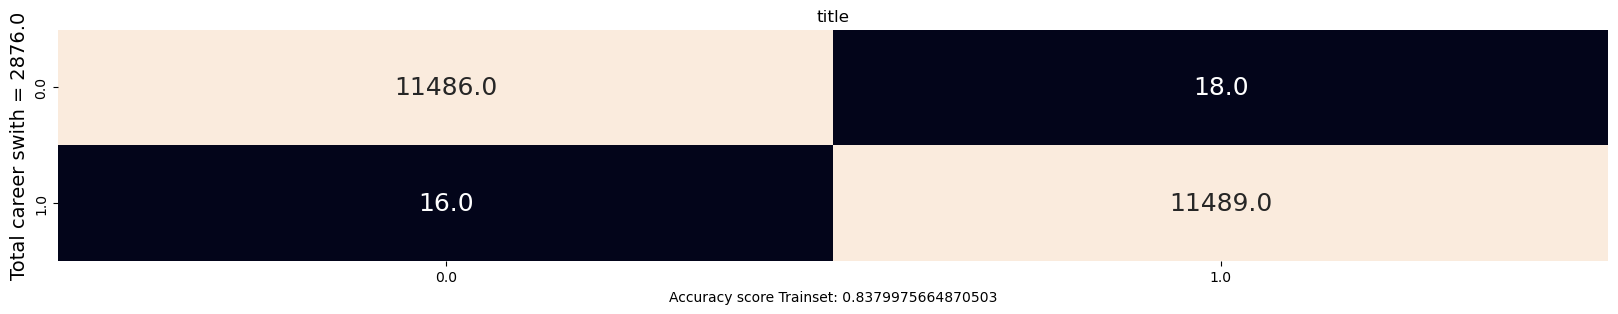

In [148]:
train_matrix = pd.crosstab(y_train, model_rf.predict(x_train), rownames=['Actual'], colnames=['Predicted'])
f,(ax1) = plt.subplots(1,1,sharey=True, figsize=(20, 3))
g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
g1.set_title("title")
g1.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model_rf.predict(x_test), y_test)))
plt.show() 

**from above Random Forest Classifier gives more accuracy and provides best fit model for this dataset.**

In [149]:
#Cross Validation

In [150]:
from sklearn.model_selection import cross_val_score

In [151]:
cross_val_scores = cross_val_score(rf_cls, x_train, y_train, cv=5, scoring='accuracy')

In [152]:
print("Average Cross-Validation Accuracy:", cross_val_scores.mean())

Average Cross-Validation Accuracy: 0.8295013715533942





# Load test dataset into python environment

In [153]:

test = pd.read_csv("aug_test.csv")

In [154]:
# Display the first few rows of the test dataset
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [155]:

# Display the last few rows of the test dataset
test.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84
2128,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11


In [156]:
# checking shape of the test data
test.shape

(2129, 13)

In [157]:
# checking for column names
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [158]:
# checking info for dtype and value count
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [159]:
# basic descriptive statistics view for test data
test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [160]:
#formatting company_size for better use and understanding.
test['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Large'],inplace=True)

In [161]:
#formatting relevent_experience for better use and understanding.
test["relevent_experience"].replace(["Has relevent experience", "No relevent experience"],
                             ['Yes','No'],inplace=True)


In [162]:

#formatting last_new_job for better use and understanding.
test["last_new_job"].replace(["never"],["0"],inplace=True)

In [163]:
test["experience"].replace([">20","<1"],["21","0"],inplace=True) #replacing to valid feature values.

In [164]:

#Performing null value detection
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [165]:
#perfoming null value filling similar to train data in test data
test["company_size"].fillna(value="NW",inplace=True) #not working yet
test["company_type"].fillna(value="NW",inplace=True)
test["gender"].fillna(value="DNM",inplace=True) #Didnot mention

In [166]:
test["enrolled_university"].fillna(test["enrolled_university"].mode()[0], inplace = True)
test["education_level"].fillna(test["education_level"].mode()[0], inplace = True)
test["major_discipline"].fillna(test["major_discipline"].mode()[0], inplace = True)
test["experience"].fillna(test["experience"].mode()[0], inplace= True)
test["last_new_job"].fillna(test["last_new_job"].mode()[0], inplace= True)

In [167]:
test["last_new_job"].replace([">4"],
                        ['5'],inplace=True)

In [168]:

test["major_discipline"].value_counts()

STEM               1933
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64

In [169]:
test["company_size"].value_counts()

NW         622
Small      510
Large      428
Medium     406
Startup    163
Name: company_size, dtype: int64

In [170]:


test["company_type"].value_counts()

Pvt Ltd                1141
NW                      634
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [171]:
test["experience"] = test["experience"].astype(int)

In [172]:
test["last_new_job"] = test["last_new_job"].astype(int)

In [173]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [174]:
Z= test.drop(['enrollee_id',"city"],axis=1) # dropping enrollee id and city
Z

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,Male,Yes,Full time course,Graduate,STEM,9,Startup,NW,1,21
1,0.920,Female,Yes,no_enrollment,Graduate,STEM,5,NW,Pvt Ltd,1,98
2,0.624,Male,No,no_enrollment,High School,STEM,0,NW,Pvt Ltd,0,15
3,0.827,Male,Yes,no_enrollment,Masters,STEM,11,Small,Pvt Ltd,1,39
4,0.920,Male,Yes,no_enrollment,Graduate,STEM,21,Large,Pvt Ltd,5,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,Male,No,no_enrollment,Graduate,Humanities,16,NW,Public Sector,4,15
2125,0.897,Male,Yes,no_enrollment,Masters,STEM,18,NW,NW,2,30
2126,0.887,Male,No,no_enrollment,Primary School,STEM,3,NW,Pvt Ltd,0,18
2127,0.804,Male,Yes,Full time course,High School,STEM,7,Medium,Public Sector,1,84


In [175]:
#performing preprocessing

from sklearn.preprocessing import LabelEncoder 


In [176]:
le= LabelEncoder()

In [177]:
Z["relevent_experience"] = le.fit_transform(Z["relevent_experience"])

In [178]:

Z["gender"] = le.fit_transform(Z["gender"])

In [179]:
Z["company_size"] = le.fit_transform(Z["company_size"])

In [180]:

Z["education_level"] = le.fit_transform(Z["education_level"])

In [181]:

Z

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.827,2,1,Full time course,0,STEM,9,4,NW,1,21
1,0.920,1,1,no_enrollment,0,STEM,5,2,Pvt Ltd,1,98
2,0.624,2,0,no_enrollment,1,STEM,0,2,Pvt Ltd,0,15
3,0.827,2,1,no_enrollment,2,STEM,11,3,Pvt Ltd,1,39
4,0.920,2,1,no_enrollment,0,STEM,21,0,Pvt Ltd,5,72
...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,2,0,no_enrollment,0,Humanities,16,2,Public Sector,4,15
2125,0.897,2,1,no_enrollment,2,STEM,18,2,NW,2,30
2126,0.887,2,0,no_enrollment,4,STEM,3,2,Pvt Ltd,0,18
2127,0.804,2,1,Full time course,1,STEM,7,1,Public Sector,1,84


In [182]:
Z = pd.get_dummies(Z) #one hot encoding
Z

,city_development_index,gender,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,enrolled_university_Full time course,enrolled_university_Part time course,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_NW,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.827,2,1,0,9,4,1,21,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0.920,1,1,0,5,2,1,98,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,2,0,1,0,2,0,15,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.827,2,1,2,11,3,1,39,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.920,2,1,0,21,0,5,72,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,2,0,0,16,2,4,15,0,0,...,0,0,0,0,0,0,0,0,1,0
2125,0.897,2,1,2,18,2,2,30,0,0,...,0,0,1,0,0,0,1,0,0,0
2126,0.887,2,0,4,3,2,0,18,0,0,...,0,0,1,0,0,0,0,0,0,1
2127,0.804,2,1,1,7,1,1,84,1,0,...,0,0,1,0,0,0,0,0,1,0


In [183]:
scaler_x = MinMaxScaler() #scaling of test data
Z= scaler_x.fit_transform(Z)

In [184]:
pred_test = model_rf.predict(Z) #predicting the target value corrresponding to valid features using Random Forest Classifier

In [185]:
submission = pd.read_csv("sample_submission.csv") 
submission

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5
...,...,...
2124,1289,0.5
2125,195,0.5
2126,31762,0.5
2127,7873,0.5


In [186]:
submission['enrollee_id']=test['enrollee_id']
submission['target']=pred_test #mapping predicted values to corresponding enrolle id's in submission file.

In [187]:

submission['target'] #displaying predicted values

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
2124    0.0
2125    0.0
2126    0.0
2127    0.0
2128    0.0
Name: target, Length: 2129, dtype: float64

In [188]:
submission['target'].value_counts()

0.0    1575
1.0     554
Name: target, dtype: int64

In [189]:
submission['target'].replace(0.0,'Not looking for Job change',inplace=True) 
submission['target'].replace(1.0,'Looking for Job change',inplace=True) 

In [190]:

submission['target'].value_counts() #unique value count

Not looking for Job change    1575
Looking for Job change         554
Name: target, dtype: int64

**from above it is clear that many candidates do not look for job change.**

In [191]:
pd.DataFrame(submission,columns=['enrollee_id','target']).to_csv('sub.csv',index=False)

In [192]:
import pickle  # Pickling of Random forest classifier to push it into python framework flask for model deployment.

In [193]:
filename="savemodel.pickle"

In [194]:
with open(filename,"wb") as file:
  pickle.dump(model_rf,file)